In [ ]:
# ABOUT DATASET
# Temperature:- Temperature in Kelvin
# Ro :- Radius of star wrt to the sun
# Lo:- Luminosity of the star relative to the sun
# Color :- Color of the star
# Spectral_Class:- An asteroid spectral type is assigned to asteroids based on their emission spectrum, color, and sometimes albedo. 
# These types are thought to correspond to an asteroid's surface composition.
#
# Type:
#
# Red Dwarf - 0 
# Brown Dwarf - 1 
# White Dwarf - 2 
# Main Sequence - 3 
# Super Giant - 4 
# Hyper Giant - 5

**IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**LOADING DATA**

In [ ]:
stars = pd.read_csv('/content/Stars.csv')
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


**DATA EXPLORATION**

In [ ]:
# first 5 rows
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [ ]:
# last 5 rows
stars.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [ ]:
# datatypes
stars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [ ]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
# null values
stars.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [ ]:
# duplicated values
stars.duplicated().sum()

0

In [ ]:
# Red Dwarf - 0 
# Brown Dwarf - 1 
# White Dwarf - 2 
# Main Sequence - 3 
# Super Giant - 4 
# Hyper Giant - 5

star_types = {
    0: "Red Dwarf",
    1: "Brown Dwarf",
    2: "White Dwarf",
    3: "Main Sequence",
    4: "Super Giant",
    5: "Hyper Giant"
}

# change star types from integers to real types of stars
for index in tqdm(range(len(star_types.keys()))):
  stars["Type"] = stars["Type"].replace(index, star_types[index])

stars.head()

100%|██████████| 6/6 [00:00<00:00, 1903.47it/s]


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


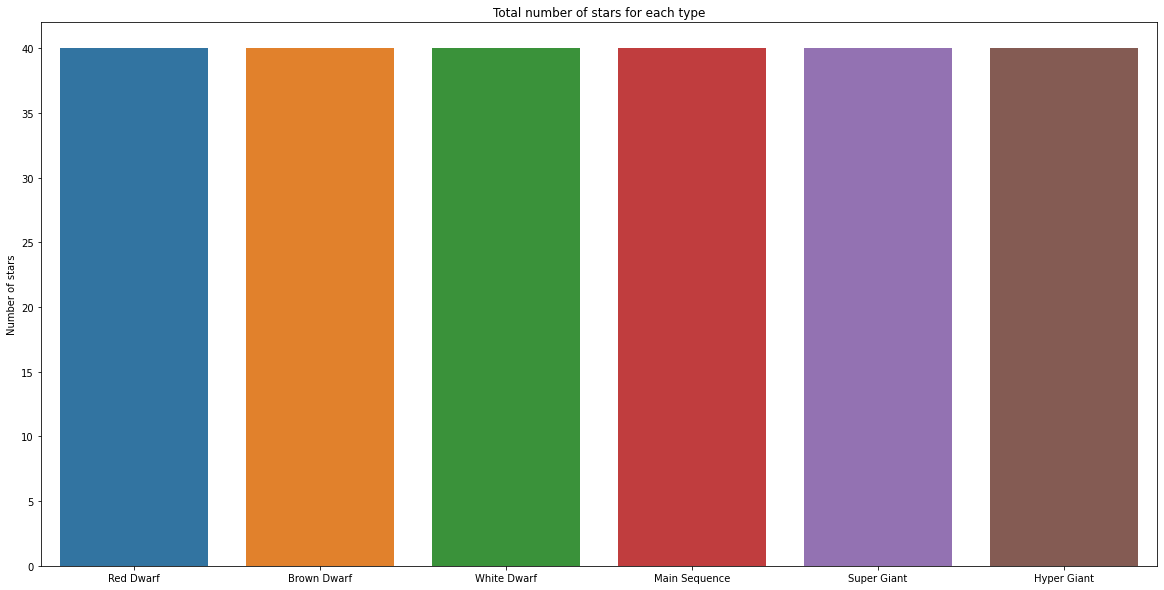

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Total number of stars for each type")

sns.barplot(x=stars['Type'].unique(), y=stars['Type'].value_counts())

plt.ylabel("Number of stars")
plt.show()

# in the below chart, we can observe we have 40 records of each type of star

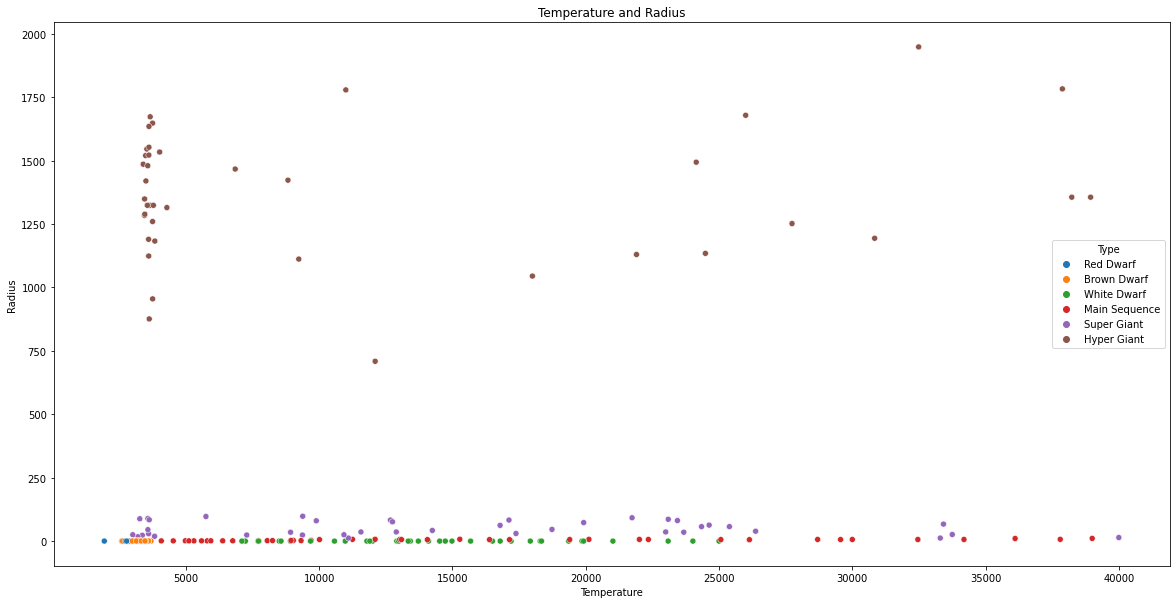

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Temperature and Radius")

sns.scatterplot(x=stars['Temperature'], 
                y=stars['R'],
                hue=stars['Type'],
                data=stars)

plt.ylabel("Radius")
plt.show()

# here we can observe that "Hyper Giants" have a bigger radius than the other types 

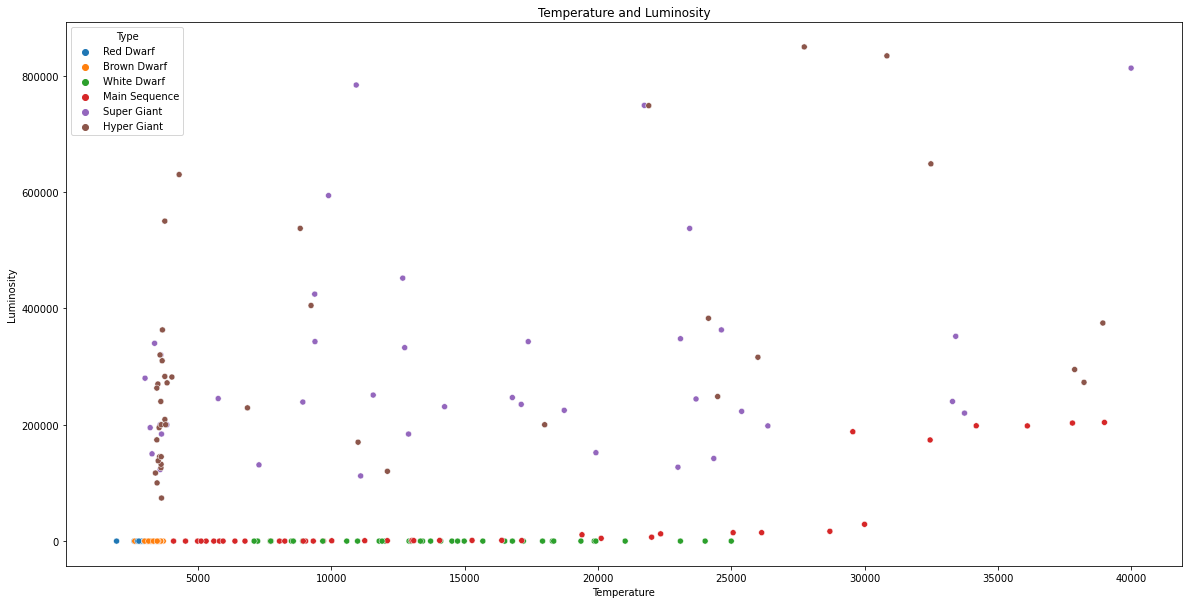

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Temperature and Luminosity")

sns.scatterplot(x=stars['Temperature'], 
                y=stars['L'],
                hue=stars['Type'],
                data=stars)

plt.ylabel("Luminosity")
plt.show()

# So, "Hyper Giants" tend to be the most luminous ones, but "Super Giants" which are smaller are equally luminous
# There must be a relation between Luminosity and Radius, where "Super Giants" are an exception

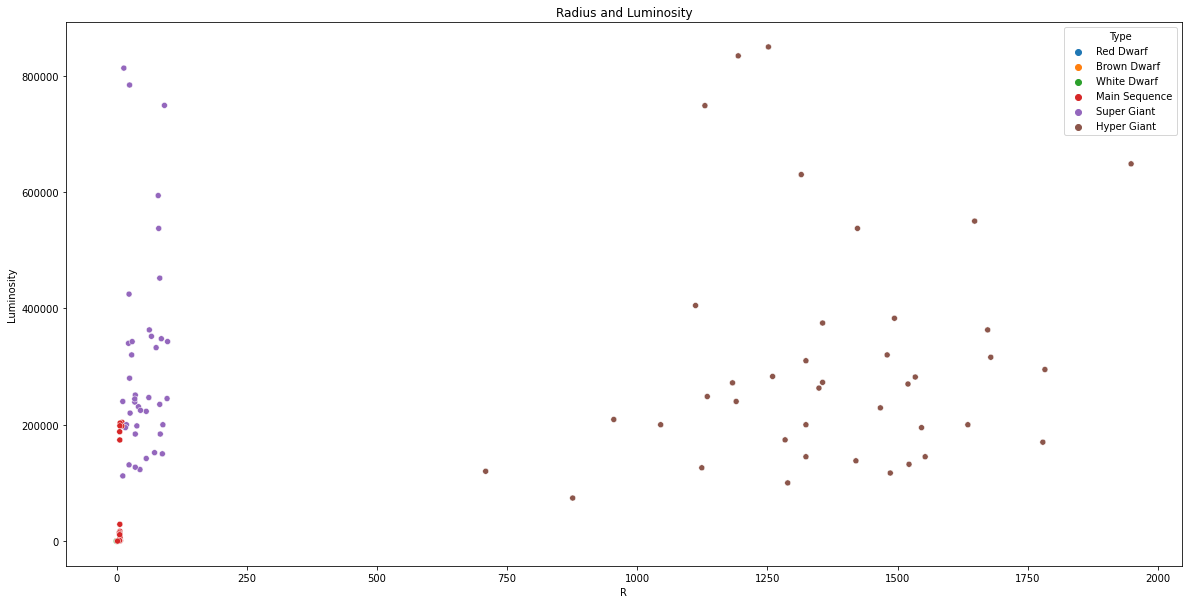

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Radius and Luminosity")

sns.scatterplot(x=stars['R'], 
                y=stars['L'],
                hue=stars['Type'],
                data=stars)

plt.ylabel("Luminosity")
plt.show()

# we can observe that "Hyper Giants" are the biggest and brightest, followed by "Super Giants"

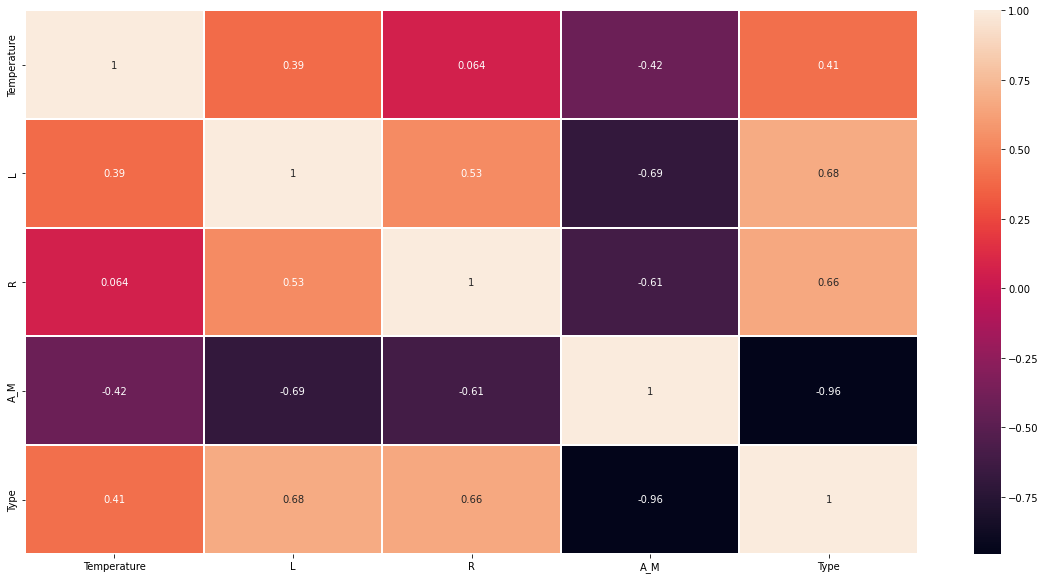

In [ ]:
# get dataset without the replaced Star Types
stars_types_not_replaced = pd.read_csv('/content/Stars.csv')

plt.figure(figsize=(20, 10))

sns.heatmap(stars_types_not_replaced.corr(), annot=True, linewidths=1)
plt.show()

# here we can observe a correlation between the Star Type and the Absolute Magnitude

**GET VALUES FOR KEYBOARD INPUT**

In [ ]:
# get rows to test
nr_test_values = 5

test_values = stars.sample(nr_test_values)
test_values

,Temperature,L,R,A_M,Color,Spectral_Class,Type
47,3574,200000.0000,89.000,-5.24,Red,M,Super Giant
167,26373,198000.0000,39.000,-5.83,Blue,O,Super Giant
33,9700,74.0000,2.890,0.16,Whitish,B,Main Sequence
162,12675,452000.0000,83.000,-5.62,Blue,O,Super Giant
2,2600,0.0003,0.102,18.70,Red,M,Red Dwarf


In [ ]:
test_values_X = test_values.drop(["Type"], axis=1)
test_values_X

,Temperature,L,R,A_M,Color,Spectral_Class
47,3574,200000.0000,89.000,-5.24,Red,M
167,26373,198000.0000,39.000,-5.83,Blue,O
33,9700,74.0000,2.890,0.16,Whitish,B
162,12675,452000.0000,83.000,-5.62,Blue,O
2,2600,0.0003,0.102,18.70,Red,M


In [ ]:
test_values_y = test_values["Type"]
test_values_y

47       Super Giant
167      Super Giant
33     Main Sequence
162      Super Giant
2          Red Dwarf
Name: Type, dtype: object

In [ ]:
# drop rows that will be used for test
for index in test_values.index:
  stars = stars.drop(index)

**PreProcessing Colors:**

In [ ]:
stars.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'yellow-white',
       'Whitish', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
stars.Color.value_counts()

Red                   110
Blue                   54
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Orange                  2
yellowish               2
Pale yellow orange      1
Whitish                 1
White-Yellow            1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [ ]:
#replace similar color names
stars.replace({'Red': 'red'}, regex=True, inplace=True)
stars.replace({'Blue': 'blue'}, regex=True, inplace=True)
stars.replace({'Blue-White': 'blue-white'}, regex=True, inplace=True)
stars.replace({'Blue White': 'blue-white'}, regex=True, inplace=True)
stars.replace({'Blue white': 'blue-white'}, regex=True, inplace=True)
stars.replace({'blue white': 'blue-white'}, regex=True, inplace=True)
stars.replace({'yellowish': 'yellow-white'}, regex=True, inplace=True)
stars.replace({'Yellowish': 'yellow-white'}, regex=True, inplace=True)
stars.replace({'Yellowish White': 'yellow-white'}, regex=True, inplace=True)
stars.replace({'White': 'white'}, regex=True, inplace=True)
stars.replace({'Whitish': 'white'}, regex=True, inplace=True)
stars.replace({'Orange-Red': 'orange'}, regex=True, inplace=True)
stars.replace({'Orange': 'orange'}, regex=True, inplace=True)
stars.replace({'Pale yellow orange': 'orange'}, regex=True, inplace=True)
stars.replace({'yellow-white white': 'yellow-white'}, regex=True, inplace=True)
stars.replace({'white-Yellow': 'yellow-white'}, regex=True, inplace=True)

In [ ]:
stars.Color.value_counts()

red             110
blue             54
blue-white       31
yellow-white     15
white            11
blue white       10
orange            3
orange-red        1
Name: Color, dtype: int64

In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     235 non-null    int64  
 1   L               235 non-null    float64
 2   R               235 non-null    float64
 3   A_M             235 non-null    float64
 4   Color           235 non-null    object 
 5   Spectral_Class  235 non-null    object 
 6   Type            235 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 14.7+ KB


In [ ]:
stars_dummies = pd.get_dummies(stars)
stars_dummies.shape

(235, 25)

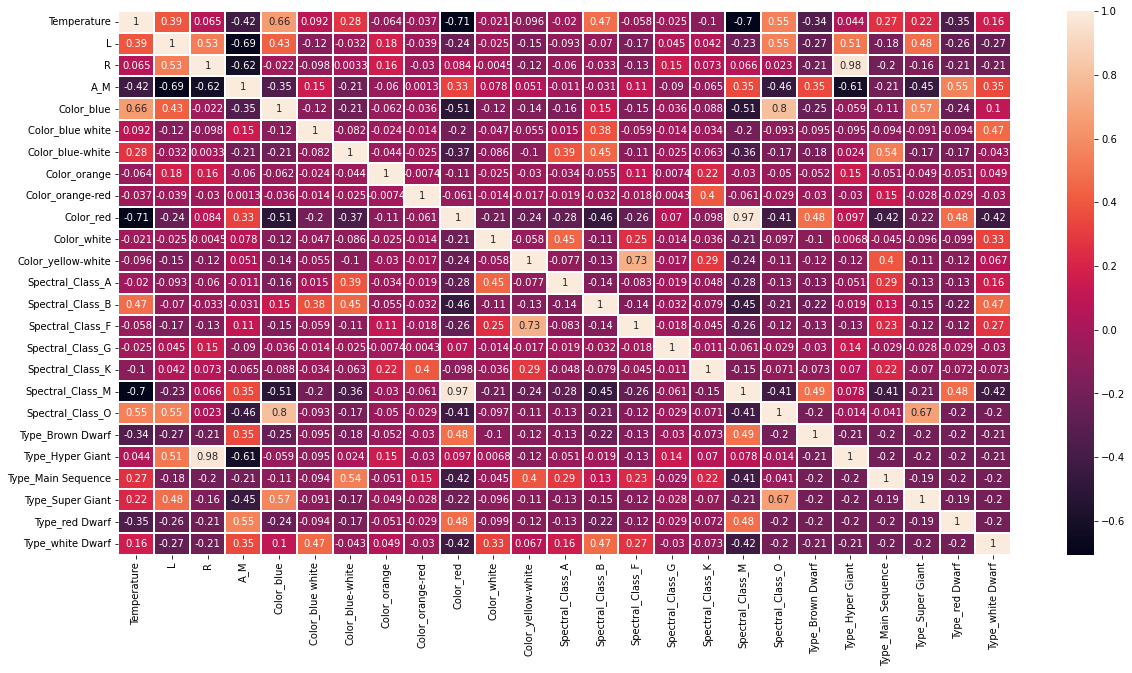

In [ ]:
plt.figure(figsize=(20, 10))

sns.heatmap(stars_dummies.corr(),
            annot=True,
            linewidths=1)

plt.show()

**PREDICT & CHECK SCORE**

In [ ]:
stars.Color.unique()

array(['red', 'blue white', 'white', 'yellow-white', 'blue-white',
       'orange', 'blue', 'orange-red'], dtype=object)

In [ ]:
mapping = {
    "red":              1,
    "blue-white":       2,
    "white":            3,
    "yellow-white":     4,
    "orange":           5,
    "blue":             6,
    "orange-red":       7 
}

#stars.replace({'set': mapping, 'Color': mapping})

#stars.Color

stars.replace({'red':           0}, regex=True, inplace=True)
stars.replace({'blue-white':    1}, regex=True, inplace=True)
stars.replace({'white':         2}, regex=True, inplace=True)
stars.replace({'yellow-white':  3}, regex=True, inplace=True)
stars.replace({'orange':        4}, regex=True, inplace=True)
stars.replace({'blue':          5}, regex=True, inplace=True)
stars.replace({'orange-red':    6}, regex=True, inplace=True)



stars.Color.unique()

array([0, 2, 1, 4, 5])

In [ ]:
stars.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [ ]:
index = 0

for spectral_class in stars.Spectral_Class.unique():
  #print(spectral_class)
  #print(index)
  stars.replace({str(spectral_class):           index}, regex=True, inplace=True)
  index = index + 1

stars.Spectral_Class.unique()

# M => 0
# B => 1
# A => 2
# F => 3
# O => 4
# K => 5
# G => 6

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
features = stars.drop(["Type"], axis=1)
target = stars["Type"]

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 50)
clf = clf.fit(X_train, y_train)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 6, 2, 0, 6, 1, 6, 6, 6, 0, 2, 0, 2, 6, 6, 2, 0, 1,
       0, 2, 6, 2, 2, 0, 2, 1, 2, 0, 6, 2, 0, 6, 6, 1, 0, 0, 6, 2, 0, 0,
       2, 6, 2, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 1, 6,
       6, 1, 1, 6, 6, 0, 2, 0, 6, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 6, 6,
       0, 6, 6, 0, 1, 1])

In [ ]:
accuracy_score(y_test, predictions)

0.9787234042553191

In [ ]:
X_test.head()

,Temperature,L,R,A_M,Color,Spectral_Class
72,3304,0.008500,0.1800,13.20,0,0
212,13089,788.000000,5.9920,-0.12,1,2
185,2889,0.000352,0.0973,16.93,0,0
10,3600,0.002900,0.5100,10.69,0,0
130,3095,0.000190,0.4920,10.87,0,0


In [ ]:
y_test.head()

72     1
212    0
185    0
10     1
130    1
Name: Type, dtype: int64

In [ ]:
#INDEXUL DIFERA CU 2!!!
stars.iloc[69]

Temperature       3304.0000
L                    0.0085
R                    0.1800
A_M                 13.2000
Color                0.0000
Spectral_Class       0.0000
Type                 1.0000
Name: 72, dtype: float64

**SIMULATE KEYBOARD INPUT**

In [ ]:
# predict on selected values for test
test_predictions = clf.predict(test_values_X)
test_predictions

ValueError: ignored

In [ ]:
accuracy_score(test_values_y, test_predictions)

In [ ]:
test_values_y

**PRINT THE GENERATED DECISION TREE**

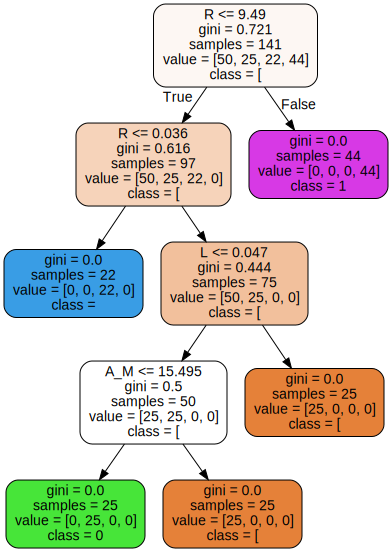

In [ ]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "stars_tree.dot"),
        feature_names=["Temperature", "L", "R", "A_M", "Color", "Spectral_Class"],
        class_names=str(stars["Type"].unique()),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "stars_tree.dot"))

**EXPORT MODEL**

In [ ]:
from joblib import dump, load

dump(clf, 'Star_Classifier.joblib')
clf = load('Star_Classifier.joblib')

** K-NEAREST NEIGHBOURS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test,y_test)